In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ted8080/house-prices-and-images-socal")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/Jack/.cache/kagglehub/datasets/ted8080/house-prices-and-images-socal/versions/1


# Here is the plan:
(I will build these into sections)  

  
Load and Explore Dataset   
Preprocess Images   
Build CNN Model  
Train CNN Model  
Extract Features from CNN  
Combine CNN Features with Other Features  
Build and Train Combined Model  
Evaluate Model Performance  

In [1]:
# Imports:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data loading and exploration

In [7]:
df = pd.read_csv(path + "/socal2.csv")

print("Dataframe: ")
print(df.head())

print("Dataframe info: ")
print(df.info())
print(df.describe())


Dataframe: 
   image_id                 street             citi  n_citi  bed  bath  sqft  \
0         0  1317 Van Buren Avenue  Salton City, CA     317    3   2.0  1560   
1         1         124 C Street W      Brawley, CA      48    3   2.0   713   
2         2        2304 Clark Road     Imperial, CA     152    3   1.0   800   
3         3     755 Brawley Avenue      Brawley, CA      48    3   1.0  1082   
4         4  2207 R Carrillo Court     Calexico, CA      55    4   3.0  2547   

    price  
0  201900  
1  228500  
2  273950  
3  350000  
4  385100  
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float6

In [8]:
print("Dataframe null values: ")
print(df.isnull().sum())

Dataframe null values: 
image_id    0
street      0
citi        0
n_citi      0
bed         0
bath        0
sqft        0
price       0
dtype: int64


# Umm CNN time?? Not sure what else to explore with the data...

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_path = path + "/socal2/socal_pics/"
print(image_path)

images = []
prices = df['price'].values

for index, row in df.iterrows():
    # Not sure what we want target size to be, maybe ask Ventura?
    image = load_img(os.path.join(image_path, f"{row['image_id']}.jpg"), target_size=(224, 224))
    image = img_to_array(image)
    images.append(image)

images = np.array(images)

# DO NOT CONVERT TO FLOATS - DO THIS IN MODEL

X_train, X_test, y_train, y_test = train_test_split(images, prices, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



/Users/Jack/.cache/kagglehub/datasets/ted8080/house-prices-and-images-socal/versions/1/socal2/socal_pics/
(12379, 224, 224, 3) (3095, 224, 224, 3) (12379,) (3095,)


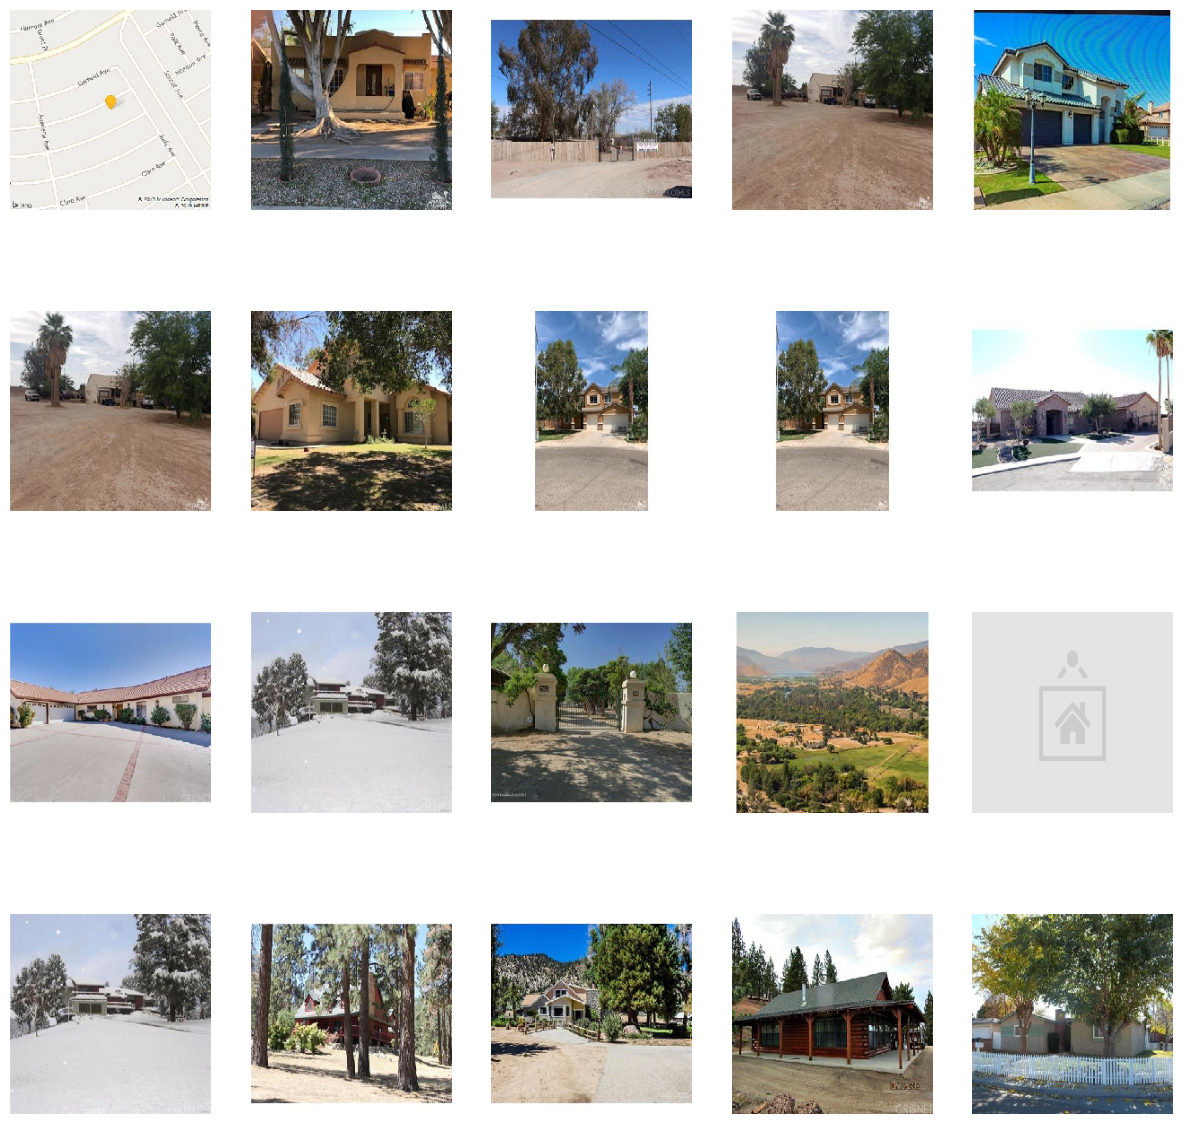

In [25]:
# i want to see some of the images:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.axis("off")
plt.show()


# Looking at the images I think we need to do the following:

Somehow use alexnet to see if it can recognize a house. If a house cannot be detected, we remove the image from the dataset and the row from the dataframe. How the hell do we do this? Not sure

In [ ]:

# import os
# import certifi
# from tensorflow.keras.applications import MobileNet
# from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

# # os.environ['SSL_CERT_FILE'] = certifi.where()

# base_model = MobileNet(weights='imagenet')

# def contains_house(image):
#     image = np.expand_dims(image, axis=0)
#     image = preprocess_input(image)
#     preds = base_model.predict(image)
#     decoded_preds = decode_predictions(preds, top=3)[0]
#     for _, label, _ in decoded_preds:
#         print(f"Label: {label}")  # Print the label to debug
#         if 'house' in label or 'building' in label:
#             return True
#     return False

# filtered_images = []
# filtered_df = []

# for img, row in zip(images, df.iterrows()):
#     print("Filtering image:", row[1]['image_id'])
#     if contains_house(img):
#         filtered_images.append(img)
#         filtered_df.append(row[1])
#     else:
#         print("House not found.")

# images = np.array(filtered_images)
# df = pd.DataFrame(filtered_df)

# print("Filtered images shape:", images.shape)
# print("Filtered dataframe shape:", df.shape)

Filtering image: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.
Filtering image: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.
Filtering image: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.
Filtering image: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.
Filtering image: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.
Filtering image: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.
Filtering image: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.
Filtering image: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Label: matchstick
Label: spotlight
Label: nematode
House not found.

KeyboardInterrupt: 

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# model.save("house_price_model.h5")

Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 200s 512ms/step - loss: 198461210624.0000 - val_loss: 137854599168.0000
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 187s 482ms/step - loss: 143970516992.0000 - val_loss: 140736479232.0000
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 187s 483ms/step - loss: 135613071360.0000 - val_loss: 140512362496.0000
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 186s 480ms/step - loss: 137810575360.0000 - val_loss: 134753255424.0000
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 188s 483ms/step - loss: 131512721408.0000 - val_loss: 149727772672.0000
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 186s 480ms/step - loss: 135329775616.0000 - val_loss: 134068649984.0000
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 185s 477ms/step - loss: 127478710272.0000 - val_loss: 130622251008.0000
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 185s 476ms/step - loss: 120665161728.0000 - val_loss: 135772315648.0000
Epoch 9/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 184s 475ms/step - loss: 117342781440.0000 - val_loss: 1363452231

In [34]:
model.evaluate(X_test, y_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 135175258112.0000


137420873728.0